In [1]:
import os
import pandas as pd
import numpy as np
from scipy.stats import spearmanr, kendalltau
from datetime import datetime

# Función para calcular las correlaciones de Spearman y Kendall
def calculate_correlations(original_data, imputed_data):
    spearman_corr, _ = spearmanr(original_data, imputed_data)
    kendall_corr, _ = kendalltau(original_data, imputed_data)
    return spearman_corr, kendall_corr

# Ruta al directorio base donde se encuentran las carpetas de cada técnica
base_directory = r"C:\Users\hctrl\OneDrive\Tesis\Experimento\Temperatura Máxima\Vacios Aleatorios"

# Carga de los datos originales
original_data_path = r"C:\\Users\\hctrl\\OneDrive\\Tesis\\Experimento\\Temperatura Máxima\\TempMax.csv"
original_data = pd.read_csv(original_data_path)

# Conversión de la fecha a formato datetime y establecer como índice
original_data['Fecha'] = pd.to_datetime({'year': original_data['Anio'], 'month': original_data['Mes'], 'day': original_data['Dia']})
original_data.set_index('Fecha', inplace=True)

# Fechas de los datos imputados
missing_dates = [
    datetime(1993, 10, 6), datetime(1995, 2, 14), datetime(1995, 2, 21), datetime(1998, 6, 17), 
    datetime(1999, 5, 13), datetime(1999, 8, 14), datetime(2000, 11, 24), datetime(2001, 7, 7), 
    datetime(2005, 11, 14), datetime(2006, 3, 10), datetime(2007, 3, 30), datetime(2007, 7, 3), 
    datetime(2007, 8, 26), datetime(2008, 10, 22), datetime(2009, 9, 24)
]

# Preparar un DataFrame para guardar los resultados
correlation_results = []

# Diccionario para los nombres de las carpetas
technique_folders = {
    'Hot_Deck': 'Resultados_Imputacion_Hot_Deck',
    'IDW': 'Resultados_Imputacion_IDW',
    'KNN': 'Resultados_Imputacion_KNN',
    'Razon_Normal': 'Resultados_Imputacion_Razon_Normal',
    'WKNNI': 'Resultados_Imputacion_WKNNI',
    'ID': 'Resultados_Imputados_ID'
}

# Iterar sobre las carpetas de técnicas de imputación
for technique, folder_name in technique_folders.items():
    technique_path = os.path.join(base_directory, folder_name)
    
    # Iterar sobre los archivos CSV de imputación dentro de cada técnica
    for i in range(1, 16):
        file_name = f'TempMax_imputado_{technique}_{i + 1}.csv'
        file_path = os.path.join(technique_path, file_name)
    
        # Verificar si el archivo existe
        if os.path.isfile(file_path):
            # Carga de los datos imputados
            imputed_data = pd.read_csv(file_path)
            imputed_data['Fecha'] = pd.to_datetime({'year': imputed_data['Anio'], 'month': imputed_data['Mes'], 'day': imputed_data['Dia']})
            imputed_data.set_index('Fecha', inplace=True)

            # Filtrar los datos originales y los imputados solo para la ID_CIDERH "M_023_A_II"
            original_sub = original_data[original_data['ID_CIDERH'] == 'M_023_A_II']
            imputed_sub = imputed_data[imputed_data['ID_CIDERH'] == 'M_023_A_II']

            # Filtrar los datos por las fechas específicas de datos faltantes
            original_missing = original_sub.loc[missing_dates]
            imputed_missing = imputed_sub.loc[missing_dates]

            # Calcular las correlaciones
            spearman_corr, kendall_corr = calculate_correlations(original_missing['TEMP_MAX_RBE'], imputed_missing['TEMP_MAX_RBE'])

            # Agregar los resultados a la lista
            correlation_results.append({
                'Technique': technique,
                'File': file_name,
                'Spearman': spearman_corr,
                'Kendall': kendall_corr
            })

# Convertir la lista de resultados en un DataFrame
correlation_results_df = pd.DataFrame(correlation_results)

# Guardar los resultados en un archivo CSV
results_csv_path = os.path.join(base_directory, 'correlations_results.csv')
correlation_results_df.to_csv(results_csv_path, index=False)

# Imprimir los resultados
print(correlation_results_df)

   Technique                             File  Spearman   Kendall
0   Hot_Deck  TempMax_imputado_Hot_Deck_2.csv  0.892665  0.826923
1   Hot_Deck  TempMax_imputado_Hot_Deck_3.csv  0.682753  0.650725
2   Hot_Deck  TempMax_imputado_Hot_Deck_4.csv  0.557641  0.516752
3   Hot_Deck  TempMax_imputado_Hot_Deck_5.csv  0.352100  0.363641
4   Hot_Deck  TempMax_imputado_Hot_Deck_6.csv  0.350313  0.344502
..       ...                              ...       ...       ...
79        ID       TempMax_imputado_ID_11.csv  0.530831  0.421057
80        ID       TempMax_imputado_ID_12.csv  0.722074  0.574169
81        ID       TempMax_imputado_ID_13.csv  0.743521  0.593308
82        ID       TempMax_imputado_ID_14.csv  0.757820  0.593308
83        ID       TempMax_imputado_ID_15.csv  0.729223  0.555030

[84 rows x 4 columns]


In [2]:
import pandas as pd

df = pd.read_csv("correlations_results.csv")

# Calcular estadísticas descriptivas para Spearman y Kendall por técnica
descriptive_stats_spearman = df.groupby('Technique')['Spearman'].describe()
descriptive_stats_kendall = df.groupby('Technique')['Kendall'].describe()

# Calcular el IQR para Spearman y Kendall
descriptive_stats_spearman['IQR'] = descriptive_stats_spearman['75%'] - descriptive_stats_spearman['25%']
descriptive_stats_kendall['IQR'] = descriptive_stats_kendall['75%'] - descriptive_stats_kendall['25%']

# Medidas adicionales de Kurtosis y Skewness
descriptive_stats_spearman['Kurtosis'] = df.groupby('Technique')['Spearman'].apply(pd.Series.kurtosis)
descriptive_stats_spearman['Skewness'] = df.groupby('Technique')['Spearman'].skew()
descriptive_stats_kendall['Kurtosis'] = df.groupby('Technique')['Kendall'].apply(pd.Series.kurtosis)
descriptive_stats_kendall['Skewness'] = df.groupby('Technique')['Kendall'].skew()

print(descriptive_stats_spearman)
print(descriptive_stats_kendall)

              count      mean       std       min       25%       50%  \
Technique                                                               
Hot_Deck       14.0  0.611317  0.249556  0.234138  0.368186  0.620197   
ID             14.0  0.449055  0.315270 -0.075067  0.210009  0.503128   
IDW            14.0  0.493610  0.310307 -0.035746  0.235925  0.549598   
KNN            14.0  0.526037  0.303721  0.035746  0.257373  0.567471   
Razon_Normal   14.0  0.157722  0.366590 -0.378910 -0.099643  0.101877   
WKNNI          14.0  0.523228  0.300595  0.035746  0.263628  0.567471   

                   75%       max       IQR  Kurtosis  Skewness  
Technique                                                       
Hot_Deck      0.866399  0.907954  0.498213 -1.675942 -0.133842  
ID            0.727436  0.892665  0.517426 -1.206468 -0.337190  
IDW           0.779268  0.892665  0.543342 -1.265513 -0.379170  
KNN           0.825738  0.892665  0.568365 -1.509292 -0.255660  
Razon_Normal  0.409741  0

C:\Users\hctrl\AppData\Local\Temp\ipykernel_15084\1525382878.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  spearman_cat_counts = correlation_results_df.groupby(['Technique', 'Spearman_Cat']).size().unstack().fillna(0)


<Figure size 800x400 with 0 Axes>

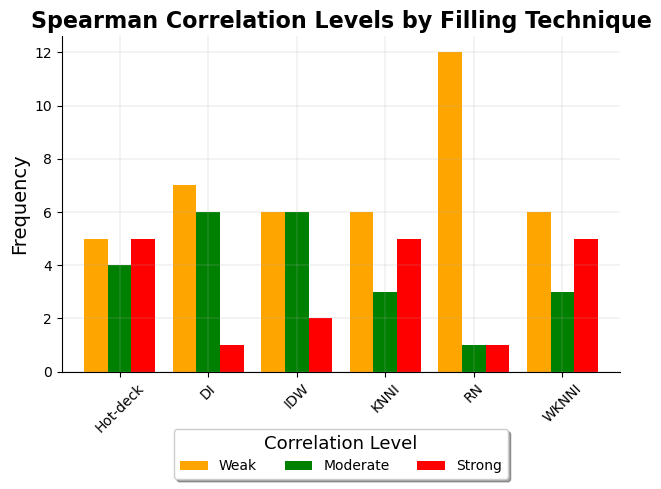

In [3]:
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv("correlations_results.csv")

# Correlaciones de spearman
#correlation_results_df['Spearman_Cat'] = pd.cut(correlation_results_df['Spearman'], bins=[0, 0.3, 0.6, 1], labels=['Weak', 'Moderate', 'Strong'])

correlation_results_df['Spearman_Cat'] = pd.cut(correlation_results_df['Spearman'], bins=[-np.inf, 0.5, 0.8, np.inf], labels=['Weak', 'Moderate', 'Strong'])

spearman_cat_counts = correlation_results_df.groupby(['Technique', 'Spearman_Cat']).size().unstack().fillna(0)

technique_names = {'Hot_Deck': 'Hot-deck', 'IDW': 'IDW', 'KNN': 'KNNI', 'ID': 'DI', 'Razon_Normal': 'RN', 'WKNNI': 'WKNNI'}
spearman_cat_counts.rename(index=technique_names, inplace=True)

# Plot
plt.figure(figsize=(8, 4))
spearman_cat_counts.plot(kind='bar', stacked=False, color=['orange', 'green', 'red'], width=0.8)
plt.title('Spearman Correlation Levels by Filling Technique', fontsize=16, fontweight='bold')
plt.xlabel('Filling Techniques', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xticks(rotation=45) 

plt.tight_layout()  
plt.grid(linestyle='-', linewidth=0.2)

ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.legend(title='Correlation Level', fontsize=10, title_fontsize='13', loc='upper center', bbox_to_anchor=(0.5, -0.15), fancybox=True, shadow=True, ncol=3)

plt.show()

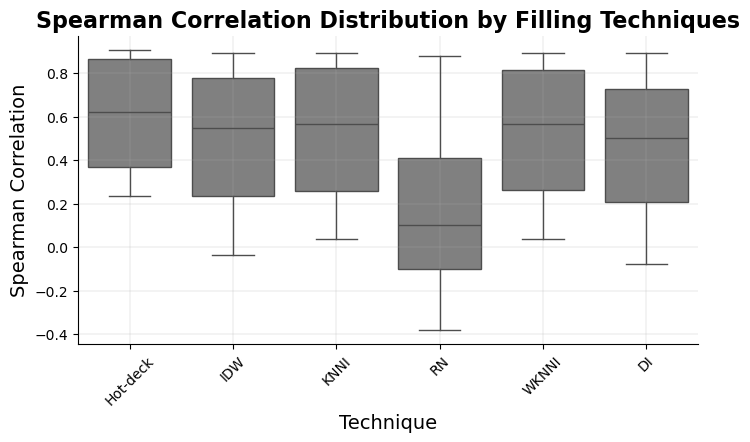

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("correlations_results.csv")

plt.figure(figsize=(8, 4))
boxplot = sns.boxplot(x='Technique', y='Spearman', data=df, color='gray', linewidth=1)

technique_names = ['Hot-deck', 'IDW', 'KNNI', 'RN', 'WKNNI', 'DI']

boxplot.set_xticklabels(technique_names)

plt.title('Spearman Correlation Distribution by Filling Techniques', fontsize=16, fontweight='bold')
plt.xlabel('Technique', fontsize=14)
plt.ylabel('Spearman Correlation', fontsize=14)
plt.xticks(fontsize=10, rotation=45)
plt.grid(linestyle='-', linewidth=0.2)
sns.despine()
plt.show()

C:\Users\hctrl\AppData\Local\Temp\ipykernel_15084\2984455168.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  kendall_cat_counts = correlation_results_df.groupby(['Technique', 'Kendall_Cat']).size().unstack().fillna(0)


<Figure size 800x400 with 0 Axes>

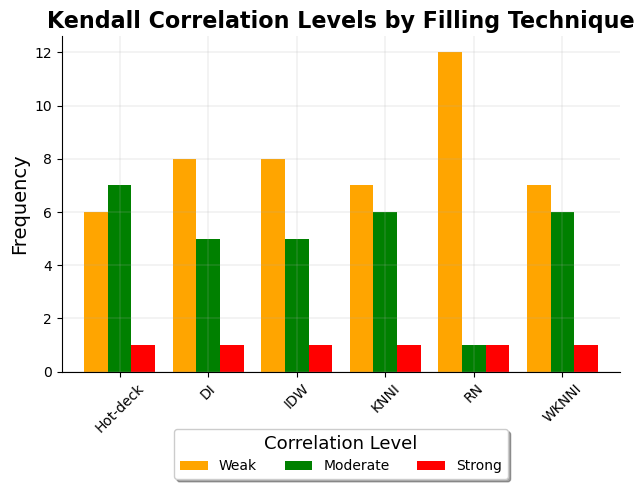

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

correlation_results_df = pd.read_csv("correlations_results.csv")

# Kendall correlation categorization
correlation_results_df['Kendall_Cat'] = pd.cut(correlation_results_df['Kendall'], bins=[-np.inf, 0.5, 0.8, np.inf], labels=['Weak', 'Moderate', 'Strong'])

kendall_cat_counts = correlation_results_df.groupby(['Technique', 'Kendall_Cat']).size().unstack().fillna(0)

technique_names = {'Hot_Deck': 'Hot-deck', 'IDW': 'IDW', 'KNN': 'KNNI', 'ID': 'DI', 'Razon_Normal': 'RN', 'WKNNI': 'WKNNI'}
kendall_cat_counts.rename(index=technique_names, inplace=True)

# Plot
plt.figure(figsize=(8, 4))
kendall_cat_counts.plot(kind='bar', stacked=False, color=['orange', 'green', 'red'], width=0.8)
plt.title('Kendall Correlation Levels by Filling Technique', fontsize=16, fontweight='bold')
plt.xlabel('Filling Techniques', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xticks(rotation=45)

plt.tight_layout()
plt.grid(linestyle='-', linewidth=0.2)

ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.legend(title='Correlation Level', fontsize=10, title_fontsize='13', loc='upper center', bbox_to_anchor=(0.5, -0.15), fancybox=True, shadow=True, ncol=3)

# Display plot
plt.show()

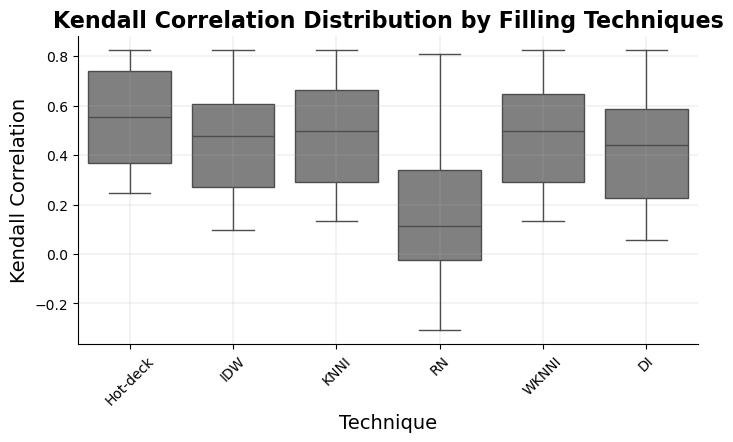

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("correlations_results.csv")

plt.figure(figsize=(8, 4))
boxplot = sns.boxplot(x='Technique', y='Kendall', data=df, color='gray', linewidth=1)

technique_names = ['Hot-deck', 'IDW', 'KNNI', 'RN', 'WKNNI', 'DI']

boxplot.set_xticklabels(technique_names)

plt.title('Kendall Correlation Distribution by Filling Techniques', fontsize=16, fontweight='bold')
plt.xlabel('Technique', fontsize=14)
plt.ylabel('Kendall Correlation', fontsize=14)
plt.xticks(fontsize=10, rotation=45)
plt.grid(linestyle='-', linewidth=0.2)
sns.despine()
plt.show()

In [1]:
import os
import pandas as pd
from datetime import datetime

# Función para calcular los errores residuales
def calculate_residual_errors(original_data, imputed_data):
    return (original_data - imputed_data).abs()

# Ruta al directorio base donde se encuentran las carpetas de cada técnica
base_directory = r"C:\Users\hctrl\OneDrive\Tesis\Experimento\Temperatura Máxima\Vacios Aleatorios"

# Carga de los datos originales
original_data_path = r"C:\Users\hctrl\OneDrive\Tesis\Experimento\Temperatura Máxima\TempMax.csv"
original_data = pd.read_csv(original_data_path)
original_data['Fecha'] = pd.to_datetime({'year': original_data['Anio'], 'month': original_data['Mes'], 'day': original_data['Dia']})
original_data.set_index('Fecha', inplace=True)

#filtrar los datos originales para la ID_CIDERH "M_023_A_II"
original_data = original_data[original_data['ID_CIDERH'] == 'M_023_A_II']

# Fechas de los datos imputados
missing_dates = [
    datetime(1993, 10, 6), datetime(1995, 2, 14), datetime(1995, 2, 21), datetime(1998, 6, 17), 
    datetime(1999, 5, 13), datetime(1999, 8, 14), datetime(2000, 11, 24), datetime(2001, 7, 7), 
    datetime(2005, 11, 14), datetime(2006, 3, 10), datetime(2007, 3, 30), datetime(2007, 7, 3), 
    datetime(2007, 8, 26), datetime(2008, 10, 22), datetime(2009, 9, 24)
]

# Preparar un DataFrame para guardar los errores residuales
residuals_results = []

# Diccionario para los nombres de las carpetas
technique_folders = {
    'Hot_Deck': 'Resultados_Imputacion_Hot_Deck',
    'IDW': 'Resultados_Imputacion_IDW',
    'KNN': 'Resultados_Imputacion_KNN',
    'Razon_Normal': 'Resultados_Imputacion_Razon_Normal',
    'WKNNI': 'Resultados_Imputacion_WKNNI',
    'ID': 'Resultados_Imputados_ID'
}

# Iterar sobre las carpetas de técnicas de imputación
for technique, folder_name in technique_folders.items():
    technique_path = os.path.join(base_directory, folder_name)
    
    # Iterar sobre los archivos CSV de imputación dentro de cada técnica
    for i in range(1, 16):
        file_name = f'TempMax_imputado_{technique}_{i}.csv'
        file_path = os.path.join(technique_path, file_name)
    
        # Verificar si el archivo existe
        if os.path.isfile(file_path):
            # Carga de los datos imputados
            imputed_data = pd.read_csv(file_path)
            imputed_data['Fecha'] = pd.to_datetime({'year': imputed_data['Anio'], 'month': imputed_data['Mes'], 'day': imputed_data['Dia']})
            imputed_data.set_index('Fecha', inplace=True)

            # Filtrar los datos imputados solo para la ID_CIDERH "M_023_A_II"
            imputed_sub = imputed_data[imputed_data['ID_CIDERH'] == 'M_023_A_II']

            # Filtrar los datos por las fechas específicas de datos faltantes
            original_missing = original_data.loc[missing_dates]
            imputed_missing = imputed_sub.loc[missing_dates]

            # Calcular los errores residuales
            residual_errors = calculate_residual_errors(original_missing['TEMP_MAX_RBE'], imputed_missing['TEMP_MAX_RBE'])

            # Agregar los resultados a la lista
            residuals_results.append({
                'Technique': technique,
                'File': file_name,
                'Residual_Error': residual_errors.mean()  # Calculamos la media del error residual
            })

# Convertir la lista de errores residuales en un DataFrame
residuals_df = pd.DataFrame(residuals_results)

# Guardar los errores residuales en un archivo CSV
residuals_csv_path = os.path.join(base_directory, 'residuals_results.csv')
residuals_df.to_csv(residuals_csv_path, index=False)

# Calcular estadísticas descriptivas para los errores residuales
descriptive_stats_residuals = residuals_df.groupby('Technique')['Residual_Error'].describe()

# Calcular el IQR 
descriptive_stats_residuals['IQR'] = descriptive_stats_residuals['75%'] - descriptive_stats_residuals['25%']

# Agregar medidas de curtosis y asimetría
descriptive_stats_residuals['Kurtosis'] = residuals_df.groupby('Technique')['Residual_Error'].apply(pd.Series.kurtosis)
descriptive_stats_residuals['Skewness'] = residuals_df.groupby('Technique')['Residual_Error'].skew()

print(descriptive_stats_residuals)

              count      mean       std       min       25%       50%  \
Technique                                                               
Hot_Deck       15.0  4.029278  2.175235  0.411905  2.438483  4.233162   
ID             15.0  7.598438  4.239133  0.763146  4.354877  7.733122   
IDW            15.0  4.765605  2.569675  0.402923  2.864661  5.299302   
KNN            15.0  5.855832  3.246912  0.593769  3.392583  6.002534   
Razon_Normal   15.0  5.441587  2.984686  0.184752  3.203566  5.848883   
WKNNI          15.0  5.704204  3.280700  0.482341  3.150050  5.862407   

                    75%        max       IQR  Kurtosis  Skewness  
Technique                                                         
Hot_Deck       5.745646   7.425195  3.307163 -1.052567 -0.151282  
ID            11.026312  14.117158  6.671435 -1.173389 -0.096170  
IDW            6.545817   8.758409  3.681157 -0.968866 -0.250390  
KNN            8.466684  10.885585  5.074100 -1.148271 -0.100586  
Razon_Normal 

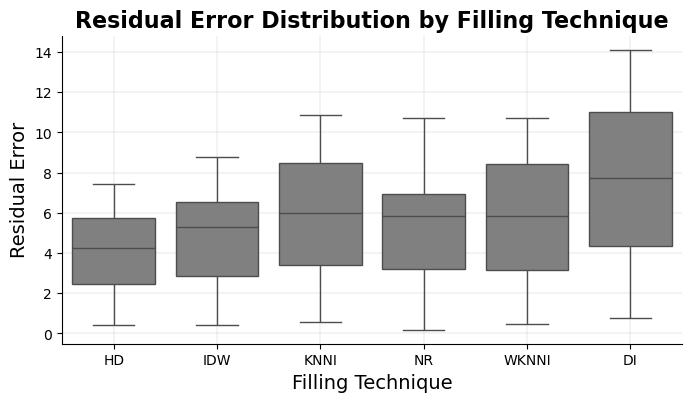

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

# Reemplazo de los nombres de las técnicas
new_names = {
    'Hot_Deck': 'HD',
    'IDW': 'IDW',
    'KNN': 'KNNI',
    'ID': 'DI',
    'Razon_Normal': 'NR',
    'WKNNI': 'WKNNI'
}


residuals_df['Technique'] = residuals_df['Technique'].replace(new_names)

plt.figure(figsize=(8, 4))
sns.boxplot(x='Technique', y='Residual_Error', data=residuals_df, color='gray', linewidth=1)
plt.grid(linestyle='-', linewidth=0.2)
plt.title('Residual Error Distribution by Filling Technique', fontsize=16, fontweight='bold')
plt.xlabel('Filling Technique', fontsize=14)
plt.ylabel('Residual Error', fontsize=14)
sns.despine()

# Guarda la imagen en formato .eps
plt.savefig('residuals_plot.eps', format='eps', bbox_inches='tight')

plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


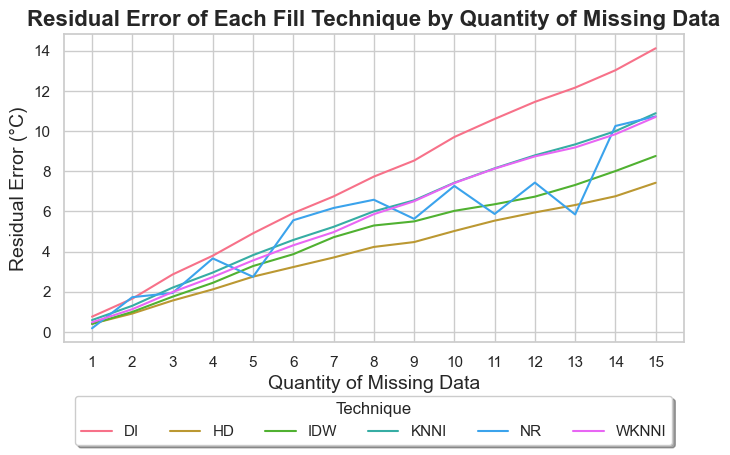

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

residuals_df = pd.read_csv('residuals_results.csv')

# Reemplazo de los nombres de las técnicas
new_names = {
    'Hot_Deck': 'HD',
    'IDW': 'IDW',
    'KNN': 'KNNI',
    'ID': 'DI',
    'Razon_Normal': 'NR',
    'WKNNI': 'WKNNI'
}

residuals_df['Technique'] = residuals_df['Technique'].replace(new_names)

residuals_df['Iteration'] = residuals_df['File'].str.extract(r'_(\d+)\.csv').astype(int)

pivot_df = residuals_df.pivot(index='Iteration', columns='Technique', values='Residual_Error')

# Define el estilo del gráfico
sns.set(style="whitegrid")

# Crea el gráfico de líneas con líneas continuas
plt.figure(figsize=(8, 4))

palette = sns.color_palette("husl", len(pivot_df.columns))

sns.lineplot(data=pivot_df, palette=palette, dashes=False)

# Añade título y etiquetas a los ejes
plt.title('Residual Error of Each Fill Technique by Quantity of Missing Data', fontsize=16, fontweight='bold')
plt.xlabel('Quantity of Missing Data', fontsize=14)
plt.ylabel('Residual Error (°C)', fontsize=14)

# Añade leyenda fuera del gráfico
plt.legend(title='Technique', loc='upper center', bbox_to_anchor=(0.5, -0.15), fancybox=True, shadow=True, ncol=len(pivot_df.columns))

plt.xticks(ticks=pivot_df.index, labels=pivot_df.index)

# Guarda la imagen en formato .eps
plt.savefig('residuals_plot.eps', format='eps', bbox_inches='tight')

# Muestra el gráfico
plt.show()